# <center>Aston University <br/><br/> CS3IVP: Digital Image and Video Processing <br/><br/> Lab 03</center>

Lecturers:<br/>
Debaleena Roy <a href="mailto:d.roy@aston.ac.uk">d.roy@aston.ac.uk</a> <br/>
Office: MB265K <br/>

Martin Rudorfer <a href="mailto:m.rudorfer@aston.ac.uk">m.rudorfer@aston.ac.uk</a> <br/>
Office: MB214G <br/>

## Goals
To revisit previous laboratory sessions.


## Instructions
No submission is required for this laboratory.

## Task 3.1
In this task, we will practise writing *vectorised* code with NumPy arrays, without using any loops.
Assume that `v` and `u` are NumPy matrices of the same size, composed of **a single row** (*e.g.*, $(1.1, 2.1, 0.4, 3.2, 1.4, 9.2)$).

Advice:
- Create the `v` and `u` variables first and use them to help you check that your answer is correct. For that purpose, you can use the NumPy's random array generation function `np.random.random` *e.g.*, `row_vector = np.random.random((1,10))`.
- For task 3.1.b, you can run the loop-based code to check if both solutions give the same values. If you do so, please do not forget to make copies of the matrices, as **the code overwrites** them.
- To make a copy of an array (to avoid one being overwritten) you can use NumPy's `array` constructor: *e.g.*, `copy_of_the_array = np.array(original_array)`. It has a default parameter `copy=True`. Alternatively, you can directly use `copy_of_the_array = original_array.copy()`.
- If you're done, you can try comparing the runtime of the vectorised and loop-based code to see what difference it makes.

## Task 3.1.a
Write the equation $w = v \times u + 5\times u - 10$ as vectorised code.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, pi
from skimage.io import imread, imsave, imshow

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE OR THE LINES ABOVE)
v = np.random.random((1, 10))
u = np.random.random((1, 10))

w = v * u + 5 * u - 10

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE OR THE LINES BELOW)

## Task 3.1.b
Rewrite the following loop-based code in a vectorised form:
```
for i in range(v.shape[1]):
    v[0,i] = v[0,i]/u[0,i] + cos(2.*pi*u[0,i])
```

In [3]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

u_orig = np.random.random((1,6))
v_orig = np.random.random((1,6))
print(v_orig)

# loop-based
u = np.array(u_orig)
v = np.array(v_orig)
for i in range(v.shape[1]):
    v[0,i] = v[0,i]/u[0,i] + cos(2.*pi*u[0,i])
print(v)

# vectorised
u = np.array(u_orig)
v = np.array(v_orig)
v = v/u + cos(2.*pi*u)
print(v)


# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

[[0.76283308 0.47117194 0.15177443 0.13260373 0.12878956 0.21662768]]
[[ 1.76960778  1.13365847  0.42186471  1.0420002  -0.62651856  1.82059273]]
[[ 1.76960778  1.13365847  0.42186471  1.0420002  -0.62651856  1.82059273]]


## Task 3.2
Consider the code below. To fully understand what is going on, we would like to know the values of the `x`, `y` and `z` variables at four different points: (1) after the initial assignment, (2) after the call to `function1`, (3) after the call to `function2`, and (4) after the division? That is, in lines 14, 17, 20, and 23. For each of the **four**, provide the values of the three variables. What observations do you make?


**Write your answers in the code cell below.**

```
01 def function1(x):
02     return x+1
03 
04 def function2(a, b, z):
05     z = z * 2
06     a = a + z
07     b = a^2
08     return b
09 
10 #  Initial assignments
11 x = np.array( [[ 0,  1]] )
12 y = np.array( [[20, 30]] )
13 z = np.array( [[ 1,  1]] )
14 
15 #  Call to function1
16 x = function1(x)
17 
18 #  Call to function1
19 z = function2(x, y, z)
20 
21 #  Division
22 z = z/2
23
```

In [4]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE OR THE LINES ABOVE)

def function1(x):
     return x+1

def function2(a, b, z):
    z = z * 2
    a = a + z
    b = a^2
    return b
 
#  Initial assignments
x = np.array( [[ 0,  1]] )
y = np.array( [[20, 30]] )
z = np.array( [[ 1,  1]] )
print(f'x:{x} y:{y} z:{z}')
#  Call to function1
x = function1(x)
print(f'x:{x} y:{y} z:{z}')
#  Call to function2
z = function2(x, y, z)
print(f'x:{x} y:{y} z:{z}')
#  Division
z = z/2
print(f'x:{x} y:{y} z:{z}')



# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE OR THE LINES BELOW)

x:[[0 1]] y:[[20 30]] z:[[1 1]]
x:[[1 2]] y:[[20 30]] z:[[1 1]]
x:[[1 2]] y:[[20 30]] z:[[1 6]]
x:[[1 2]] y:[[20 30]] z:[[0.5 3. ]]


## Task 3.3
Write a function `slice` which performs intensity slicing as defined in the "Global Image Enhancement" lecture slides. As arguments, it should take an image matrix, a two-element list containing the critical values defining the slice, and a value to which to send pixels falling between the two critical values. For example, the following call:

`slice(img, [100,150], 0)`

should return a copy of `img` in which all pixels with values in the range $[100,150]$ (inclusive) have been sent to $0$ (black).

Make sure that the code is vectorised and not loop-based.

Hint: Remember that you can use NumPy's logical operators (*e.g.*, `logical_or`, `logical_and`) to compute a boolean mask.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave, imshow

# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE OR THE LINES ABOVE)

def slice(image, thresholds, value):
    tmp = np.array(image)
    mask = np.logical_and(thresholds[0] <= tmp, tmp <= thresholds[1])
    tmp[mask] = value
    return tmp


# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE OR THE LINES BELOW)

## Task 3.4
Download the image `house.bmp` from Blackboard. In this task, you will use your `slice` function to slice the sky from the image so that its pixels are sent to black.
- Use the function with appropriate values to process the image.
- Display the result.
- To choose a good threshold value, please plot the histogram of the image. Based on that, discuss what would be a good value.

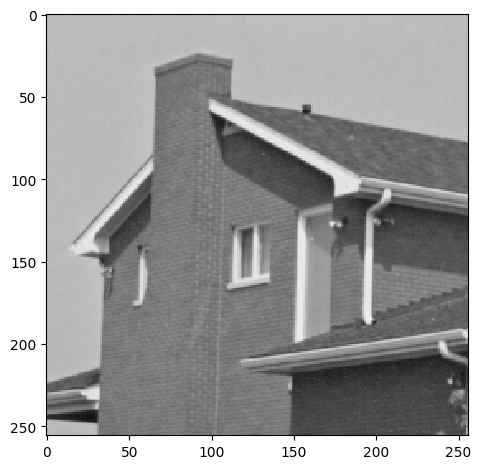

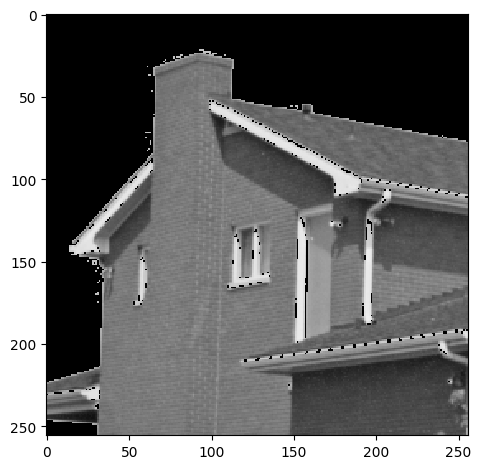

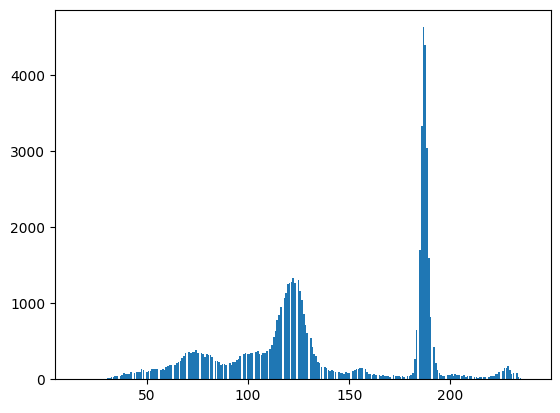

In [10]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

image = imread('house.bmp')
imshow(image)
plt.figure()

a = slice(image, [180, 194], 0)
imshow(a);

plt.figure();

histogram, edges = np.histogram(image, bins=256)
plt.bar(edges[:-1], histogram);

# 180 and 194 are good values because the sky corresponds to the spike on the right. 180 and 194 seem to surround it.
# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)